In [1]:
from fastai.vision import *

In [2]:
path = Path('data')

In [3]:
classes = ['barn', 'long-ears', 'snowy', 'great-gray']

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

barn


long-ears


snowy


great-gray


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['barn', 'great-gray', 'long-ears', 'snowy'], 4, 1028, 257)

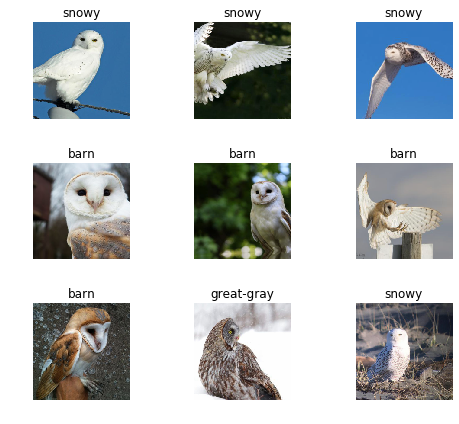

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.006962,0.172801,0.046693,03:47
1,0.523540,0.102064,0.042802,03:48
2,0.341870,0.096691,0.031128,03:46
3,0.242719,0.096090,0.031128,03:46


In [9]:
learn.save('stage-1')

In [10]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


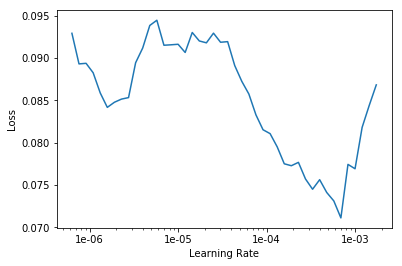

In [12]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.125033,0.354043,0.097276,05:10
1,0.092447,0.093638,0.019455,05:09


In [15]:
learn.save('stage-2')

In [16]:
learn.load('stage-2');

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

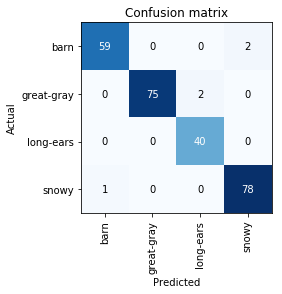

In [18]:
interp.plot_confusion_matrix()

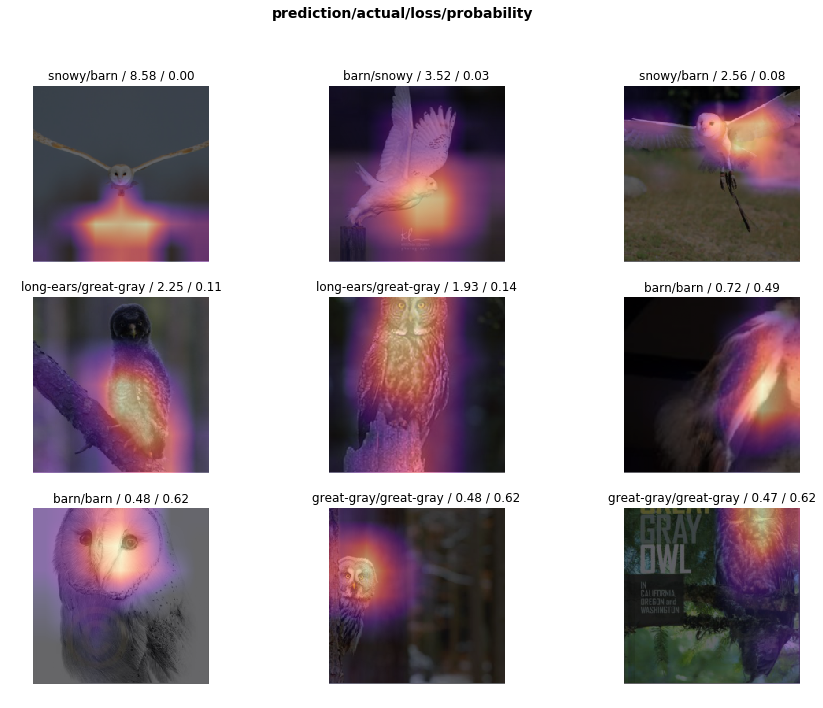

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [22]:
learn.export()

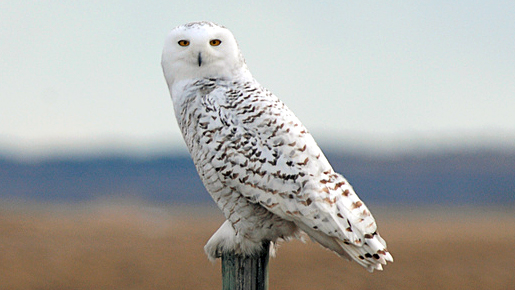

In [20]:
img = open_image('imgs/snowy.jpg')
img

In [23]:
learn = load_learner(path)

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
str(pred_class)

'snowy'